# Tarea 2 -  COM4001 Minería de Datos
## Profesor: Luis Cossio.
## Ayudante: Luis Miranda.
---

- Nombre: Felipe Coliman, Fabián Ayala
- Fecha de Entrega: 09-05-2024


## Objetivos:

* Uso de notebooks de Python y entrega de informes basados en esta herramienta.
* Introducción a modelos de aprendizaje supervisado.
* Uso de estos modelos para hacer clasificación binaria (Entre dos posibles clases).
* Comprender como dividir los datos para entrenamiento y prueba de los modelos.
* Análisis de métricas de desempeño, comparación y selección del mejor modelo en base a los resultados.
* Implementación de un Algortimo de Clasificación.

## Instrucciones:

* La tarea a realizar se debe presentar en grupos de **2 personas**, cualquier copia o plagio será sancionada con nota 1.0 a todos los involucrados y con posible sumario.
* La tarea consiste en entrenar y probar diferentes modelos de clasificación, para luego probar sus desempeños con métricas especificas, para finalmente seleccionar el mejor modelo y configuración de este, aplicando los conceptos de minería de datos aprendidos en Catedras y Ayudantías. Las soluciones en código y las interpretaciones de resultados deben ir en el mismo notebook donde se va creando el informe y serán evaluadas.
* La tarea debe contener una sección de discusión, conclusión y selección del mejor modelo, en base a los resultados obtenidos, sientase libre de explayarse profundamente en este punto.
* Se debe agregar una sección de referencias al final de la tarea.
* Para la presentación final de la tarea se debe subir su notebook Python en formato .ipynb

## Introducción:
### Neutrinos:
- Trabajaremos con un set de datos de neutrinos, obtenido de UCI Machine Learning Repository. Los datos utilizados en este experimento se obtuvieron a partir de una muestra de neutrinos producidos por un haz de partículas que incide sobre un blanco. Cada observación en el dataset corresponde a un evento detectado por el detector MiniBooNE. Algunos de los atributos incluyen la energía del neutrino, el ángulo de emisión del neutrino, la energía del evento asociado y la cantidad de energía depositada en diferentes partes del detector. Los neutrinos son partículas subatómicas sin carga eléctrica y muy pequeñas, por lo que pueden viajar a través de la materia sin interactuar con ella en gran medida. Se estima que alrededor de 100 mil millones de neutrinos atraviesan tu cuerpo cada segundo, procedentes principalmente del Sol y de supernovas en otras partes de nuestra galaxia. Aunque son partículas muy comunes, su detección es difícil debido a su falta de interacción con la materia, lo que ha llevado a la construcción de grandes detectores subterráneos para intentar capturarlos.

- Tu tarea será constribuir con la detección de estas partículas, construyendo clasificadores binarios capaces de poder discriminar Neutrinos electrónicos  versus Neutrinos muónicos. Debe notar que este dataset está desbalanceado, ya que posee una gran cantidad de datos correspondiente a la clase de Neutrino muónico, por lo que deberá tener en cuenta este hecho cuando analice sus resultados.

Puede encontrar mas informacion sobre los dos tipos de Neutrinos a trabajar en los siguientes links:
- **Neutrino Electrónico:** https://es.wikipedia.org/wiki/Neutrino_electr%C3%B3nico.
- **Neutrino Muónico:** https://es.wikipedia.org/wiki/Neutrino_mu%C3%B3nico)

Esta tarea consta de 6 partes principales:

1.   **Marco Teórico:** Se deben presentar las definiciones de los conceptos, modelos y métricas usadas durante la tarea.
2.   **Carga y Estandarización**: Se debe cargar el set de datos considerando las instrucciones y luego pre procesarlo para su posterior estudio.
3.   **Etiquetado y Separación del conjunto de Datos:** Se debe asignar una etiqueta númerica para cada clase y luego separar el set de datos en los conjuntos Entrenamiento y Prueba (No usaremos set de validación).
4.   **Construir diferentes modelos de clasificación:** Supervisando el aprendizaje de estos con el set de datos de entrenamiento, cambiando algunos parámetros de los algoritmos, para luego probar su desempeño con el set de datos de prueba.
5.   **Métricas de Desempeño:** Se deben utilizar las métricas de desempeño estudiadas para comparar y evaluar los mejores modelos y luego generar un apartado de conclusiones donde haga la selección del mejor algoritmo y su configuración, para resolver este problema, basandose en los resultados obtenidos en esta sección, deberá justificar detalladamente su selección final.
6.   **Implementación de KNN desde Cero**: En esta parte usted debe implementar desde cero el algoritmo de clasificacion K-Nearest Neighbors usando las firmas de funciones y estructura sugerida en la tarea, para luego entrenarlo, crear una nueva prediccion y evaluar su desempeño, comparandolo con los resultados del clasificador de sklearn.





In [2]:
from google.colab import drive;
drive.mount('/content/drive');

Mounted at /content/drive


# Parte 1: Marco Teórico
Investigue y entregue una definición para los siguientes conceptos:


- **Aprendizaje Supervisado**:

Cuando hablamos de aprendizaje supervisado nos referimos a un enfoque en el campo del Aprendizaje de Maquina(Machine Learning). El proposito de este algoritmo es aprender a partir de datos que ya estan etiquetados con la respuesta correcta, y luego de que sea entrenado, este sea capaz de predecir la salida para nuevos datos que no ha visto antes.


- **Problema de clasificación**:

Un problema de clasificación es un tipo de problema de aprendizaje supervisado, y este algoritmo es una técnica que "aprende" automáticamente cómo identificar clases/grupos en un conjunto de datos, basado en datos previamente etiquetados.

- **Entrenamiento  de  un  clasificador  (describa  los  principales  pasos y requisitos).**

Para entrenar un clasificador necesitamos seguir los siguientes pasos:

-**Recolección de datos:** Primero que nada, necesitamos recolectar datos que sean relevantes para el problema que querramos resolver. Y estos datos deben estar bien etiquetados.

-**Limpieza de datos:** En este paso limpiamos y preparamos los datos para que el modelo pueda trabajar con ellos de manera correcta y eficiente. Con limpiar nos referimos a eliminar datos duplicados, irrelevantes, errores, rellenar o descartar datos que falten. También en este paso podemos normalizar/estandarizar para que todos los datos tengan la misma escala.

-**División de datos:** Dividimos los datos en dos grupos: uno para entrenar al modelo y otro para probarlo. Esto para verificar que nuestro modelo realmente aprende y puede generalizar nuevos datos.

-**Selección del modelo:** En este paso escogeremos que tipo de algoritmo deseamos utilizar. Tenemos árboles de decisión, maquina de vectores de soporte(VSM), KNN(K-Nearest Neighbors), Naive Bayes, etc. Esta elección va a depender del tipo de problema que se nos presente.

-**Entrenamiento del modelo:** Con los datos de entrenamiento, ajustamos los parámetros de nuestro modelo. Modificandolo para que las predicciones realizadas coincidan lo mejor posible con las respuestas reales.

-**Evaluación del proyecto:** En este paso, usando el conjunto de datos de prueba, verificamos que tan bien el modelo predice las respuestas y que estas esten correctas. Para así verificar que tan bueno es el modelo o si necesita ajustes/mejoras.


Explique como funcionan los siguientes clasificadores:
  - **Naive Bayes:**

  El clasificador Naive Bayes está basado en el teorema de Bayes, nace de la asunción "ingenua" de asumir que no hay correlación entre las variables. Y esto simplifica el cálculo de la relación de variables.

  Este clasificador es fácil y rápido predecir la clase de conjunto de datos de prueba. Manteniendo la suposición de independencia.




  - **KNN (K-Nearest Neighbors):**

Este clasificador compara nuevos ejemplos con respecto al conjunto de entrenamiento. Esto hay que hacerlo de la siguiente manera:

 1) Configuramos K.

 2) Medimos las distancias.

 3) Encontramos los K vecinos más cercanos.

 4) Votación para la clasificación.





Escriba una definición para las siguientes métricas de desempeño, y luego explique como se construyen matematicamente:
  - **Falso positivo, falto negativo, verdadero positivo, verdadero negativo.**

  FP(Falso positivo): Esto sucede cuando se predice un evento como positivo, pero en realidad es negativo.

  FN(Falso negativo): Esto sucede cuando se predice un evento como negativo, pero en realidad es positivo.

  VP(Verdadero positivo): Esto sucede cuando se predice un evento como positivo, y este realmente termina siendo positivo.

  VN(Verdadero negativo): Esto sucede cuando se predice un evento como negativo, y este realmente termina siendo negativo.


  - **Precision y Recall**

**Precision:** Mide la exactitud de las predicciones positivas del modelo.


 $$precision= TP/ TP + FP$$

 **Recall:** Mide la proporción de casos positivos que fueron correctamente identificados por el modelo.

 $$recall = TP/ TP + FN $$

  - **Matriz de confusión**

  La matriz de confusión es una tabla utilizada para describir el rendimiento de un modelo de clasificación. Muestra la frecuencia de las predicciones divididas en verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


  - **Accuracy**

La accuracy mide que tan bueno es el modelo al hacer la predicción correcta, contando tanto positivos como negativos. Se calcula como la proporción de predicciones correctas entre el total de casos.

$$accuracy = VP + VN / (VP+VN+FP+FN) $$


Explique para que sirven los siguientes conjuntos de datos:
  - **Conjunto de entrenamiento (train set):**

El train set es el conjunto de datos más grande y este usa para entrenar al modelo. En este conjunto debemos enseñarle y darle toda la información necesaria para que aprenda y se pueda adaptar.


  - **Conjunto de validación (validation set):**

  El validation set se utiliza una vez tu modelo ya está en funcionamiento con lo que aprendió del train set, lo que hace es ver si realmente el modelo esta correctamente funcionando, y si no, lo ayuda a ajustar los parámetros del modelo y escoger la mejor configuración que le va.


  - **Conjunto de evaluación (test set):**

El test set vendría a ser el que prueba que el modelo esta en perfectas condiciones, con el proposito de empezar a mostrarle datos que nunca haya visto antes, y que estos los pueda clasificar de manera acertada. Aqui es donde podemos ver si nuestro modelo realmente funcionó correctamente.


# Parte 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Parte 2.1: Cargar Datos

Esta parte consiste en cargar a los datos a utilizar:

- Descargue los datos desde Ucampus.

- Reviselos. Note que la primera fila corresponde a dos números, el primero es la cantidad de neutrinos electrónicos y el segundo es la cantidad de neutrinos muónicos.

- Cargue los archivos a su entorno de trabajo y luego lealos con la función de pandas `read_csv()`, debe notar que la extensión de este archivo es .txt, para poder leer los datos desde un archivo de texto, donde los datos estan separados por espacios en blanco, debe utilizar el siguiente parámetro como separador en la función: `sep='\s+'`, además este set de datos no tiene nombres de columnas, por lo tanto deberá saltarse la primera fila, que corresponden a las cantidades de neutrinos de cada clase, para esto utilice como parametros de la funcion `read_csv()` los siguientes comandos: `header=None`, `skiprows=1`.

**NOTA: No puede modificar el archivo con los datos antes de cargarlo**


In [ ]:
pd.read_csv('/content/drive/My Drive/MiniBoo.txt', sep= '\s+', header=None, skiprows=1)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,...,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,...,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.167382,1.318900,0.870681,3.43055,0.279588,...,83.082,-34.31190,0.360148,8.16491,0.000000,0.124182,0.016155,0.789276,0.730342,0.152876
130062,5.44560,1.845700,103.4630,0.287411,0.015929,0.107495,0.679931,0.786533,3.47714,0.193390,...,170.225,16.61940,0.164154,5.83085,0.000000,0.193383,-0.397099,2.872590,0.819867,0.210619


In [4]:
#Guardamos nuestros datos en una variable
data = pd.read_csv('/content/drive/My Drive/MiniBoo.txt', sep= '\s+', header=None, skiprows=1)

## Parte 2.2: Pre Procesamiento y categorización del set de datos


- Muestre la cantidad de instancias y columnas del dataset.

- Use la función de pandas `describe()` para obtener los estadísticos de las columnas del dataset.


- A continuación deberá asignar una etiqueta de caracter númerico a cada una de las instancias siguiendo las siguientes instrucciones:
    - Cree un vector columna del tamaño de las filas totales del set de datos, luego de aplicar la estandarizacion.
    - Para las primeras 36499 posiciones del vector, asigne el valor 1, que corresponde a los Neutrinos electrónicos.
    - Para las restantes posiciones del vector, asigne el valor 0, que corresponde a los Neutrinos muónicos.


- Al examinar los estadisticos de los datos, se pueden observar valores anomalos (outliers) en los minimos de cada caracteristicas y diferencias notables de escala entre las caracteristicas, por lo tanto deberá quitar los outliers y estandarizar los datos, siguiendo las instrucciones.
> 1. Elimine de los datos todos las filas que contengan valores iguales o menores que -999.
> 2. Estandarizar los datos utilizando StandardScaler de sklearn.

**Cantidad de Instancias(filas) y columnas:**

In [ ]:
print("Número de instancias (filas):", data.shape[0])
print("Número de columnas:", data.shape[1])

Número de instancias (filas): 130064
Número de columnas: 50


**Use la función de pandas describe() para obtener los estadísticos de las columnas del dataset:**

In [ ]:
print(data.describe())

                   0              1              2              3  \
count  130064.000000  130064.000000  130064.000000  130064.000000   
mean        1.251799      -2.107551     123.795041      -3.312518   
std        60.119987      59.913094     196.010686      59.834554   
min      -999.000000    -999.000000    -999.000000    -999.000000   
25%         4.012528       0.876346      49.295075       0.241571   
50%         4.787715       1.381965     106.135500       0.272089   
75%         5.628298       1.947870     138.849250       0.315095   
max        17.057300       8.802820    4747.670000       0.736804   

                   4              5              6              7  \
count  130064.000000  130064.000000  130064.000000  130064.000000   
mean       -3.585353      -3.434412      -2.627901      -2.773691   
std        59.818130      59.827325      59.876644      59.866946   
min      -999.000000    -999.000000    -999.000000    -999.000000   
25%         0.000000       0.0853

**Punto 3 y 4:**

In [5]:
# Crear un vector con etiquetas
labels = np.zeros(data.shape[0])  # Todos inicialmente en 0
labels[:36499] = 1  # Los primeros 36499 serán 1, representando a los Neutrinos electrónicos

# Agregar el vector como columna al DataFrame
data['labels'] = labels

In [6]:
from scipy import stats

z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))  # Solo numéricos
outliers = (z_scores > 3).any(axis=1)  # Umbral del Z-score

# Eliminar outliers
data_clean = data[~outliers]
#Eliminamos filas con valores <= -999 en cualquiera de sus columnas
data_clean = data_clean[~(data_clean <= -999).any(axis=1)]


In [7]:
from sklearn.preprocessing import StandardScaler

# Separar características y etiquetas
features = data_clean.drop(columns=['labels'])  # Excluir la columna de etiquetas

# Estandarización
scaler = StandardScaler()
# Aplicamos la transformación y creamos la columna correctamente
standard_features = scaler.fit_transform(features)

# Convertir datos estandarizados de nuevo a DataFrame
standard_df = pd.DataFrame(standard_features, columns=features.columns, index=features.index)
# Agregar las etiquetas al DataFrame estandarizado
standard_df['labels'] = data_clean['labels'].values

# Parte 3


## 3.1 Conjuntos de Entrenamiento y Prueba
En esta sección será necesario realizar una separación de los datos, en dos conjuntos que utilizaremos para enseñarle a los diferentes modelos como lucen instancias de las dos categorías de neutrinos y luego probarlos con nuevos datos.

Debe hacer la siguiente división con la función `train_test_split()`:

- **Entrenamiento: 80%**
- **Prueba: 20%**

In [8]:
features = data_clean.drop(columns='labels')
labels = data_clean['labels']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

# Parte 4: Modelos de Clasificación

En esta sección debe comenzar a construir y entrenar los modelos requeridos para la realización de esta tarea.

## Parte 4.1: Naive Bayes



### (A) GaussianNB

Construya y entrene un modelo GaussianNB.

In [17]:
model_gnb = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
model_gnb.fit(X_train, y_train)

GaussianNB()

## Parte 4.2: KNeighborsClassifier


### (A) KNeighborsClassifier
Construya y entrene 4 modelos KNeighborsClassifier cambiando los siguientes parametros:

- n neighbors (Cantidad K de Vecinos)
- weights


In [10]:
#Creamos modelos con distintas configuraciones
modelo1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
modelo2 = KNeighborsClassifier(n_neighbors=3, weights='distance')
modelo3 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
modelo4 = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Entrenar cada modelo con los datos de entrenamiento;
modelo1.fit(X_train, y_train)
modelo2.fit(X_train, y_train)
modelo3.fit(X_train, y_train)
modelo4.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

## Parte 5: Métricas de Desempeño

En esta sección debes comparar el desempeño de cada uno de los modelos creados, con el conjunto de datos de prueba anteriormente obtenido con la funcion `train_test_split`, esto a traves del estudio de varias métricas comunes de clasificación.

Las métricas que se deben utilizar en esta tarea son las siguientes:

- Classification_report
- Accuracy_score
- Confusion_matrix (Genere una visualización de la matriz de confusión)

Para realizar la comparación, debes ejecutar cada modelo en el conjunto de datos de prueba y obtener los resultados de cada una de estas métricas. Luego, debes presentar de una forma detallada y ordenada los resultados de cada métrica para cada modelo y que los compares entre sí para determinar cuál modelo tiene el mejor desempeño en este conjunto de datos.

- Genere un gráfico comparativo entre los modelos para su Accuracy, Precision y Recall de los clasificadores analizados. Debe ser un gráfico por métrica a comparar (Total 3 Gráficos).


Recuerda que debes proporcionar información detallada sobre la configuración de los modelos, el preprocesamiento de los datos y cualquier otra consideración relevante que hayas tomado en cuenta al realizar esta tarea.


### Métricas de Desempeño **(GaussianNB)**:

In [18]:
# Generamos estas listas para guardar los resultados que nos van entregando los modelos y así generar los gráficos de barra
accuracy_scores = []
precision_scores = []
recall_scores = []

Reporte de Clasificación GaussianNB:

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86     18418
         1.0       0.59      0.89      0.71      6366

    accuracy                           0.81     24784
   macro avg       0.77      0.84      0.78     24784
weighted avg       0.86      0.81      0.82     24784

La precisión del modelo es: 0.8098369916074887



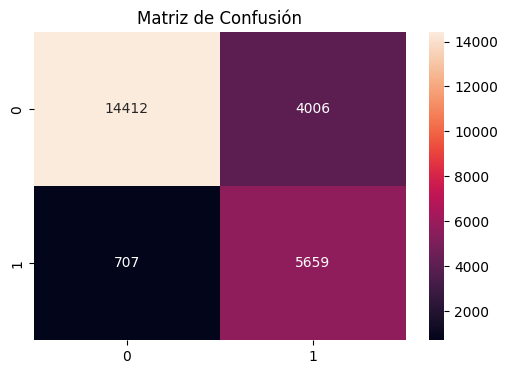

In [19]:
y_pred = model_gnb.predict(X_test)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación GaussianNB:\n")
print(report)

# Precisión y recall del reporte guardado en las variables precision_scores, recall_scores
report1 = classification_report(y_test, y_pred, output_dict = True)
precision = report1['weighted avg']['precision']
recall = report1['weighted avg']['recall']

precision_scores.append(precision)
recall_scores.append(recall)

# Calculo de la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Guardamos en la variable accuracy_scores
accuracy_scores.append(accuracy)
print(f"La precisión del modelo es: {accuracy}\n")

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title(f"Matriz de Confusión")
plt.show()

### Métricas de Desempeño **(KNeighborsClassifier)**:

Reporte de Clasificación para KNN(Uniform, K = 3):

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     18418
         1.0       0.75      0.75      0.75      6366

    accuracy                           0.87     24784
   macro avg       0.83      0.83      0.83     24784
weighted avg       0.87      0.87      0.87     24784

La precisión del modelo es: 0.8720948999354422



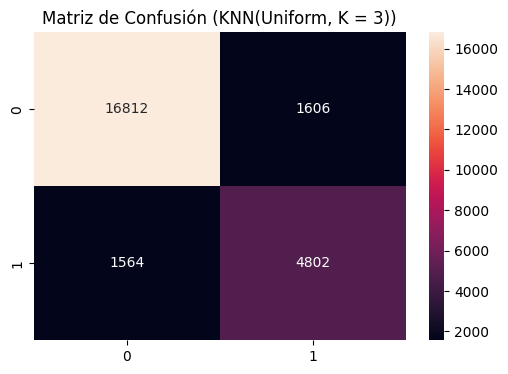

Reporte de Clasificación para KNN(Distance, K= 3):

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     18418
         1.0       0.75      0.75      0.75      6366

    accuracy                           0.87     24784
   macro avg       0.83      0.83      0.83     24784
weighted avg       0.87      0.87      0.87     24784

La precisión del modelo es: 0.8719335054874112



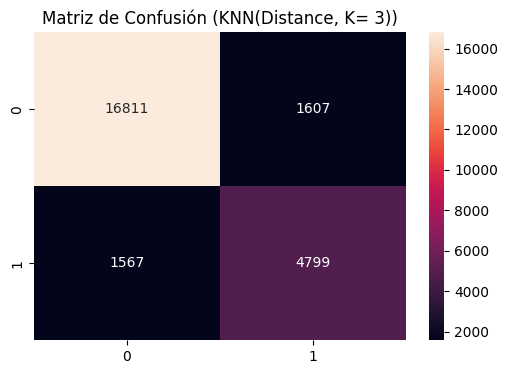

Reporte de Clasificación para KNN (Uniform, K=5):

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     18418
         1.0       0.76      0.77      0.77      6366

    accuracy                           0.88     24784
   macro avg       0.84      0.84      0.84     24784
weighted avg       0.88      0.88      0.88     24784

La precisión del modelo es: 0.8793979987088444



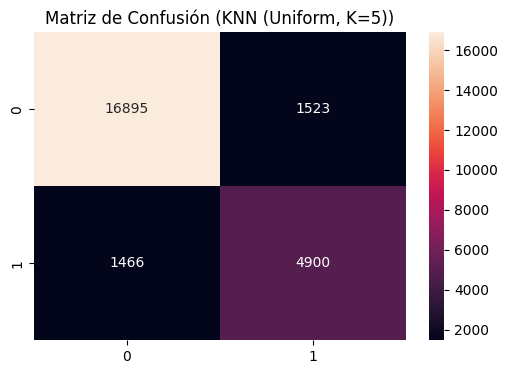

Reporte de Clasificación para KNN (Distance, K=5):

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     18418
         1.0       0.76      0.77      0.77      6366

    accuracy                           0.88     24784
   macro avg       0.84      0.84      0.84     24784
weighted avg       0.88      0.88      0.88     24784

La precisión del modelo es: 0.8793173014848289



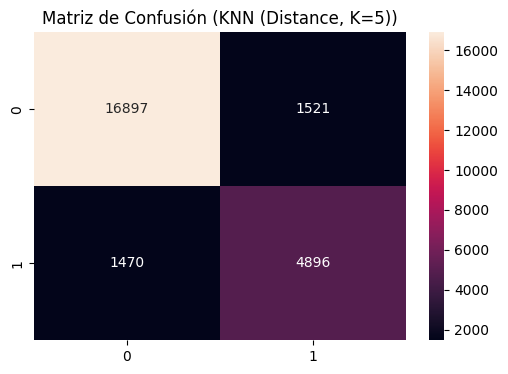

In [20]:
modelos = [modelo1, modelo2, modelo3, modelo4]
nombres_modelos = ['KNN(Uniform, K = 3)', 'KNN(Distance, K= 3)', 'KNN (Uniform, K=5)', 'KNN (Distance, K=5)']

for modelo, nombre in zip(modelos, nombres_modelos):
    y_pred = modelo.predict(X_test)
    # Reporte de clasificación de cada modelo
    print(f"Reporte de Clasificación para {nombre}:\n")
    print(classification_report(y_test, y_pred))

    # Precisión y recall del reporte guardado en las variables precision_scores, recall_scores
    report1 = classification_report(y_test, y_pred, output_dict = True)
    precision = report1['weighted avg']['precision']
    recall = report1['weighted avg']['recall']

    precision_scores.append(precision)
    recall_scores.append(recall)

    # Calculo de la precisión de cada modelo
    accuracy = accuracy_score(y_test, y_pred)
    # Guardamos en la variable accuracy_scores
    accuracy_scores.append(accuracy)
    print(f"La precisión del modelo es: {accuracy}\n")


    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    plt.title(f"Matriz de Confusión ({nombre})")
    plt.show()


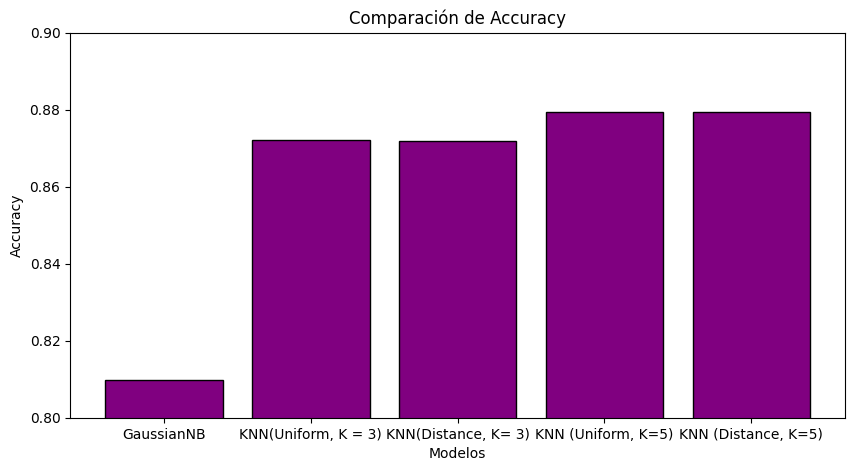

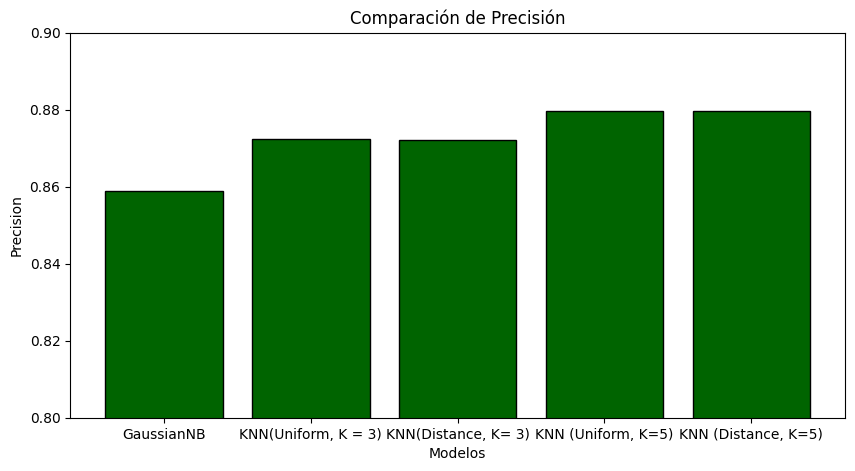

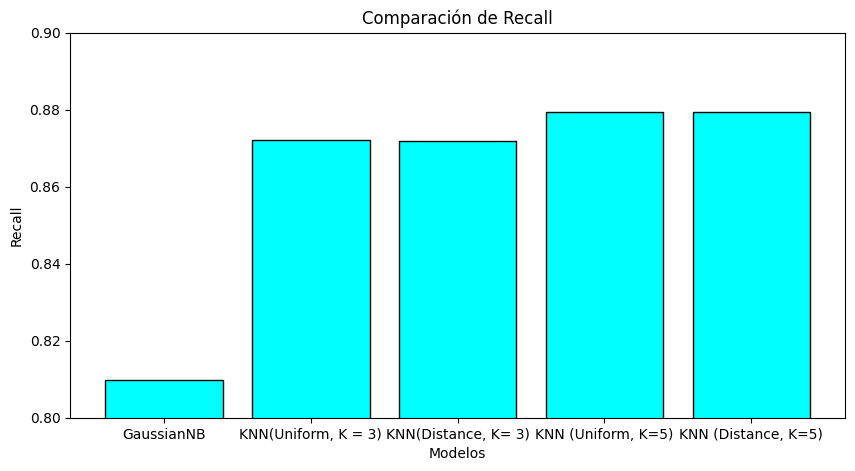

In [ ]:
nombres_modelos = ['GaussianNB', 'KNN(Uniform, K = 3)', 'KNN(Distance, K= 3)', 'KNN (Uniform, K=5)', 'KNN (Distance, K=5)']

# Creando el gráfico para Accuracy
plt.figure(figsize=(10, 5))
plt.bar(nombres_modelos, accuracy_scores, color='purple',edgecolor='black')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy')
plt.ylim([0.8, 0.9])
plt.show()

# Creando el gráfico para Precisión
plt.figure(figsize=(10, 5))
plt.bar(nombres_modelos, precision_scores, color='darkgreen',edgecolor='black')
plt.xlabel('Modelos')
plt.ylabel('Precision')
plt.title('Comparación de Precisión')
plt.ylim([0.8, 0.9])
plt.show()

# Creando el gráfico para Recall
plt.figure(figsize=(10, 5))
plt.bar(nombres_modelos, recall_scores, color='cyan', edgecolor='black')
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.title('Comparación de Recall')
plt.ylim([0.8, 0.9])
plt.show()


## Parte 6: Implementación KNN desde cero
En esta parte, se espera que implementes un clasificador KNN (k-Nearest Neighbors) desde cero. Deberás completar la implementación de la clase KNNClassifier que consta de los siguientes métodos:

### Clase KNNClassifier:
- Método __init__(self, k):
    - Descripción: Inicializa un objeto de la clase KNNClassifier con un parámetro k que representa el número de vecinos más cercanos a considerar durante la clasificación.
- Método fit(self, X_train, y_train):
    - Descripción: Entrena el clasificador KNN con los datos de entrenamiento.
    - Parámetros:
        - X_train: numpy.ndarray, un arreglo de tamaño (n_samples, n_features) que contiene las características de entrenamiento.
        - y_train: numpy.ndarray, un arreglo de tamaño (n_samples, 1) que contiene las etiquetas de clase correspondientes a los datos de entrenamiento.
- Método predict(self, X_test):
    - Descripción: Realiza predicciones sobre un conjunto de datos de prueba.
    - Parámetros:
        - X_test: numpy.ndarray, un arreglo de tamaño (n_samples, n_features) que contiene las características de prueba.
    - Devuelve:
        - predictions: Una lista de longitud n_samples que contiene las etiquetas predichas para cada instancia en X_test.
        
Para implementar este clasificador, deberás utilizar el algoritmo KNN para clasificación, el cual consiste en encontrar los k vecinos más cercanos a una instancia de prueba y asignarle la etiqueta más común entre esos vecinos.

Recuerda utilizar las funciones y librerías proporcionadas en Python para operaciones matemáticas y manipulación de datos, como NumPy y Counter.

In [12]:
from collections import Counter

class KNNClassifier:
    # Constructor de la clase KNNClassifier.
    def __init__(self, k):
      self.k = k
      self.X_train = None
      self.y_train = None

    # Guardamos datos de entrenamiento
    def fit(self, X_train, y_train):
      # Aseguramos de convertirlos a Numpy array
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)


    def predict(self, X_test):
      if isinstance(X_test, pd.DataFrame):
        X_test = X_test.to_numpy()

      predictions = []
      for test_point in X_test:
        distances = np.sqrt(np.sum((self.X_train - test_point) ** 2, axis=1)) # Distancia Euclidiana

        # Votación por mayoría
        k_neighbors_indices = np.argpartition(distances, self.k)[:self.k]

        k_neighbors_labels = self.y_train[k_neighbors_indices]

        vote = Counter(k_neighbors_labels).most_common(1)[0][0]

        predictions.append(vote)
      return predictions


In [16]:
KnnC = KNNClassifier(k=3)
# Entrenar el modelo con los datos de entrenamiento;
KnnC.fit(X_train, y_train)

### Parte 6.1: Comparar Clasificadores KNN
- Una vez haya entrenado y generado una predicción con su clasificador propio, evalue su desempeño de la misma forma que en la parte 5 y luego compare los resultados con su mejor clasificador KNN de la parte 4.2, analice sus resultados.

Reporte de Clasificación KNN desde cero:

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     18418
         1.0       0.75      0.75      0.75      6366

    accuracy                           0.87     24784
   macro avg       0.83      0.83      0.83     24784
weighted avg       0.87      0.87      0.87     24784

La precisión del modelo es: 0.8720948999354422



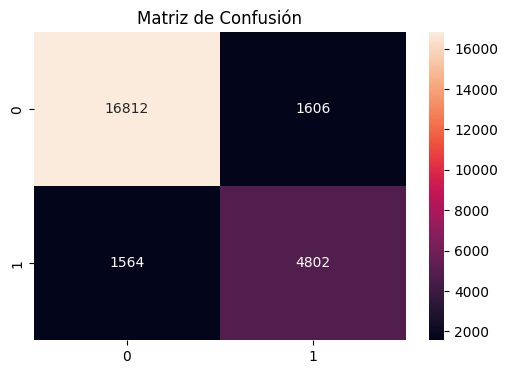

In [52]:
y_pred = KnnC.predict(X_test)


# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación KNN desde cero:\n")
print(report)

# Calculo de la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {accuracy}\n")

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title(f"Matriz de Confusión")
plt.show()



### **Comparación entre Clasificadores KNN:**

Para poder realizar el modelo KNN desde cero, se necesitó aprender como este está construido desde dentro, primero definimos la clase KNNClasifier, y empezamos con el constructor __init__ en donde especificamos el k, que sería el número de vecinos más cercanos. Luego en el método **fit** le entregamos los datasets de X_train e y_train(Convertimos estos datos en un array de Numpy para facilitar los cálculos siguientes). Como último método tenemos al **predict** que vendría a ser el corazón de esta clase, en este método definiremos el cálculo de las distancias, la búsqueda de los 'k' Vecinos más cercanos y una votación por mayoría de la libreria Counter que se nos recomienda utilizar, esto nos daría la etiqueta que más se repite para poder clasificarlo y guardarlo en la lista **predictions**.

Podemos fijarnos que tanto en el **KNN realizado desde cero**, como el implementado por la libreria **Scikit-learn**, nos entregan resultados idénticos, por lo tanto podemos concluir que ambos funcionan de manera correcta.

Ahora si comparamos en tema de eficiencia, el **KNN realizado desde cero** se demoró un tiempo aproximado de 10-15 minutos cuando el de **sk-learn** es casi inmediato no demorandose más de 10 segundos por modelo.

Otro punto importante a comparar es la funcionalidad de estos clasificadores, en el **KNN realizado desde cero** solo tenemos implementado que encuentre al K Vecinos más cercanos y el de **sk-learn** en cambio posee un amplio margen de funcionalidades que en este trabajo solo se utilizó la de Weights(peso). Teniendo toda estos parámetros disponibles:



```
KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
```

En resumen, la implementación desde  cero nos puede dar resultados similares bajo ciertas condiciones más simples, la versión de sk-learn es claramente más robusta, eficiente y flexible.

## Parte 7: Discusión y Conclusiones del trabajo

En esta sección, debe seleccionar el mejor modelo para clasificación a partir de los resultados obtenidos en la sección anterior y justificar detalladamente su elección (Al ser un set de datos desbalanceados, guiese por Precision y Recall de cada modelo). Además, deben reflexionar sobre las dificultades que enfrentaron durante la tarea y las lecciones que aprendieron.
Finalmente, debe agregar una seccion de referencias de su tarea.



### **Evaluación de modelos:**

GaussianNB:

```
Precision: 0.59
Recall: 0.89

Accuracy: 0.80983
```
KNN(Uniform, K=3):

```
Precision: 0.75
Recall: 0.75

Accuracy: 0.87209
```

KNN(Distance, K=3):
```
Precision: 0.75
Recall: 0.75

Accuracy: 0.87193

```
KNN(Uniform, K=5):
```
Precision: 0.76
Recall: 0.75

Accuracy: 0.87939

```
KNN(Distance, K=5):
```
Precision: 0.76
Recall: 0.75

Accuracy: 0.87931

```

KNN implementado desde cero:
```
Precision: 0.75
Recall: 0.75

Accuracy: 0.87209

```

Realizando la tarea nos pudimos dar cuenta la importancia de llevar a cabo una limpieza de datos adecuada y lo necesario que es estandarizar los datos, ya que estos pueden presentar información muy desbalanceada, que en este caso podía afectar negativamente a los resultados del modelo GaussianNB, presentandose una dificultad por la sensibilidad de este modelo a la variación de los datos.

Por otro lado, al momento de realizar los modelos de KNN se pudo encontrar una dificultad al escoger los Weights(pesos), más que nada por que no teniamos idea como funcionaba este valor. Por otro lado, teniamos la noción de la mejor forma de elegir los K que vendrían a ser los números impares.

La **implementación del KNN desde cero**, nos presentó preocupación al momento de ejecutar la predicción, esto fue gracias al tiempo considerable de ejecución superando los 30 minutos que nos hacía retractarnos de que estaba bien elaborado el clasificador, por lo tanto, lo que más debiamos fijarnos era en el costo computacional para que el modelo funcionase en un tiempo razonable.

Como se puede ver escogimos el 3 y el 5, cada uno de estos con un peso distinto. Gracias a esto pudimos notar que el **peso** con mayor influencia en la precisión de los datos fue el de **uniform** siendo en ambos números escogidos un mejor resultado. Viendolo de manera más general nos fijamos que al colocar un K impar mayor nos entregaba un mejor resultado al comparar sus métricas de Precision y Recall.

Comparando ambos modelos podemos notar que KNN tiene una mayor capacidad para manejar el desbalance de los datos, dado que podemos ajustar los parámetros a nuestro gusto para mejorar el rendimiento de este mismo.

Por ende, el modelo que nos entregó mejores resultados al momento de predecir correctamente, entre todas las predicciones realizadas fue **KNN(Uniform, K=5)** con una accuracy del **0.87939**.



## Referencias

Hill, R. J., & Wilkerson, J. F. (2006). Understanding MiniBooNE Results. In G. Barbiellini, & G. Bonvicini (Eds.), Proceedings of the 41st Rencontres de Moriond on Electroweak Interactions and Unified Theories (pp. 311-315). Retrieved from https://www.slac.stanford.edu/econf/C060717/papers/T012.PDF



### DOCUMENTACIÓN UTILIZADA:
- https://neo4j.com/docs/graph-data-science/current/algorithms/knn/?utm_source=Google&utm_medium=PaidSearch&utm_campaign=Evergreen&utm_content=AMS-Search-SEMCE-DSA-None-SEM-SEM-NonABM&utm_term=&utm_adgroup=DSA&gad_source=1&gclid=Cj0KCQjwxeyxBhC7ARIsAC7dS39LKkyWZ9WdFXYSysbFegq7ZqJuwWZv7JyGIaQKc4pDTxmMCVBjQboaAvX8EALw_wcB

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- https://medium.com/@lakshmiteja.ip/understanding-weighted-k-nearest-neighbors-k-nn-algorithm-3485001611ce

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html